###3.1 퍼셉트론에서 신경망으로

###3.2 활성화 함수

3.2.3 계단함수 구현하기

In [ ]:
def step_function(x):
    if x > 0:
      return 1
    else:
      return 0

In [ ]:
step_function(0.08)

1

In [ ]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [ ]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)

[-1.  1.  2.]


In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
y.astype(np.int)

array([0, 1, 1])

In [ ]:
step_function(y)

array([0, 1, 1])

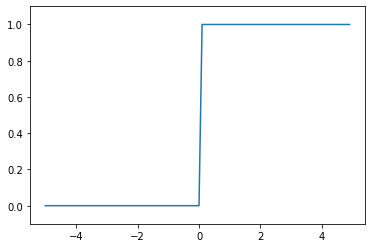

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

3.2.4 시그모이드 함수 구현하기

입력값이 작으면 0에 가깝고, 커지면 1에 가까워짐

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)

[2. 3. 4.]


In [ ]:
print(1.0 / t)

[1.         0.5        0.33333333]


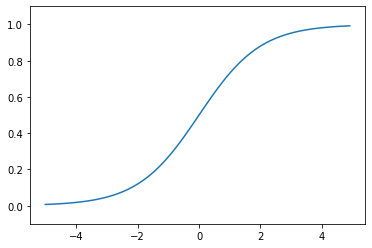

In [ ]:
import numpy as np
import matplotlib.pylab as plt

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

ReLU 함수

In [ ]:
def relu(x):
  return np.maximum(0,x)

In [ ]:
relu(-0.80)

0.0

In [ ]:
relu(8)

8

###3.3 다차원 배열의 계산


3.3.1 다차원 배열

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

3.3.2 행렬의 곱

In [ ]:
A = np.array([[1,2], [3,4]])
print(A)
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B)
print(B.shape)
np.dot(A,B)
np.dot(B,A)

[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
(2, 2)


array([[23, 34],
       [31, 46]])

관련 https://jimmy-ai.tistory.com/75

In [ ]:
A = np.array([[1,2], [3,4], [5,6]])
print(A)
print(A.shape)
B = np.array([7,8])
print(B)
print(B.shape)
np.dot(A,B) ###1차원인 경우 다차원내적으로 계산됨(솔직히 이해 잘 안감)


[[1 2]
 [3 4]
 [5 6]]
(3, 2)
[7 8]
(2,)


array([23, 53, 83])

3.3.3 신경망에서의 행렬 곱

In [ ]:
X = np.array([1,2])
print('X', X)
print('X.shape', X.shape)

w = np.array([[1,3,5],[2,4,6]])
print('w', w)
print('w.shape', w.shape)

Y = np.dot(X,w)
print('Y', Y)

X [1 2]
X.shape (2,)
w [[1 3 5]
 [2 4 6]]
w.shape (2, 3)
Y [ 5 11 17]


###3.4 3층 신경망 구현하기

실제 층 구조

입력층(0층) 2개

첫 번째 은닉층(1층) 3개

두 번째 은닉층(2층) 2개

출력층(3층) 2개의 뉴런으로 구성.

1, 2층의 활성화 함수 : 시그모이드

3층의 활성화 함수 : 항등함수

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1, 0.2, 0.2])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [ ]:
#W는 가중치, B는 편향
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1) #은닉층 1층의 신호전달

print(A1)
print(Z1)

[0.3 0.7 1. ]
[0.57444252 0.66818777 0.73105858]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [ ]:
#W는 가중치, B는 편향
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2) #은닉층 2층의 신호전달 

print(A2)
print(Z2)

[0.51039938 1.20250604]
[0.62490009 0.76897029]


In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2,0.4]])
B3 = np.array([0.1,0.2])

In [ ]:
A3 = np.dot(Z2, W3) + B3
print(A3)
Y = identity_function(A3) #은닉층 3층의 신호전달
print(Y)

[0.31628407 0.69505815]
[0.31628407 0.69505815]


3.4.3 구현정리

In [ ]:
def init_network(): #입력층
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network



def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) #1층
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) #2층
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3) #3층

    return y

network = init_network()
x = np.array([10, 0.5])
y = forward(network, x) 
print(y)   

[0.3322309  0.73059617]


###3.5 출력층 설계하기

3.5.1 항등함수와 소프트맥스 함수 구현하기

In [ ]:
a = np.array([0.3, 2.9, 4.0])
print('a', a)

exp_a = np.exp(a)
print('exp_a', exp_a)

sum_exp_a = np.sum(exp_a)
print('sum_exp_a', sum_exp_a)

y = exp_a / sum_exp_a
print('y', y)

a [0.3 2.9 4. ]
exp_a [ 1.34985881 18.17414537 54.59815003]
sum_exp_a 74.1221542101633
y [0.01821127 0.24519181 0.73659691]


In [ ]:
def sofhmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
'''지수함수로 이뤄진 계산의 경우
  퍼셉트론 층이 많아질수록 계산 결과의 수가 복잡해서
  너무 큰 값일 경우 overflow 됨
'''

a = np.array([1010, 1000, 990])
print(a)


[1010 1000  990]


In [ ]:
print(np.exp(a) / np.sum(np.exp(a)))

[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
c = np.max(a)
print('a-c', a-c) #a-c를 통해 오버플로우 방지

np.exp(a-c)/np.sum(np.exp(a-c)) 

a-c [  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

3.5.3 소프트맥스 함수의 특징

In [ ]:
#소프트맥스 함수의 모든 출력값의 합은 1
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print('y', y)
print(np.sum(y))

y [0.01821127 0.24519181 0.73659691]
1.0


###3.6 손글씨 숫자 인식

3.6.1 MNIST 데이터셋

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/dataset/mnist.py

datasets 폴더 생성 -> mnist.py 파일 생성하여 위 링크의 코드 복붙


In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from datasets.mnist import load_mnist

#데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

#각 데이터의 형상 shape 출력
print(x_train.shape) 
print(t_train.shape)  
print(x_test.shape) 
print(t_test.shape) 


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
# #케라스로 데이터 다운

# import numpy as np
# from keras.datasets import mnist

# #load data
# (x_train, t_train), (x_test, t_test) = mnist.load_data()

# #각 데이터의 형상 shape 출력
# print(x_train.shape) 
# print(t_train.shape)  
# print(x_test.shape) 
# print(t_test.shape) 

# #flatten data 
# #2차원의 28*28을 1차원의 784로 flatten화
# x_train = x_train.reshape(-1, 784)
# x_test = x_test.reshape(-1, 784)

# #각 데이터의 형상 shape 출력
# print(x_train.shape) 
# print(t_train.shape)  
# print(x_test.shape) 
# print(t_test.shape) 


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  plt.imshow(pil_img)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

5
(784,)
(28, 28)


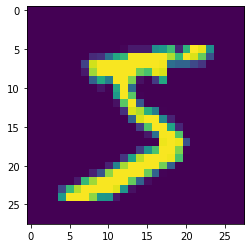

In [ ]:
img_show(img)

3.6.2 신경망의 추론 원리

입력층 784개

출력층 10개

은닉층 50개, 100개로 구성(임의)


In [ ]:
#mnist.py파일 사용안하고 직접 구현했을 코드
# def get_data():
  
#     (x_train, t_train), (x_test, t_test) = mnist.load_data()

#     #flatten
#     x_train = x_train.reshape(-1, 784)
#     x_test = x_test.reshape(-1, 784)

#     #0~1사이의 값으로 정규화
#     x_train = x_train/255
#     x_test = x_test/255

#     return x_test, t_test

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

pickle 파일 다운받아 datasets에 넣어놓음

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


#sample_weight.pkl 파일에는 가중치와 편향 매개변수가 저장되어 있음
def init_network():
    with open("/content/datasets/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

"""x에 저장된 파일을 한장씩 꺼내 predict함수로 분류"""
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # x[i]와 일치할 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]: #예측한 인덱스와 i번째 테스트셋 값이 일치할 경우 +1
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:0.9352


In [ ]:
network

{'W1': array([[-0.00741249, -0.00790439, -0.01307499, ...,  0.01978721,
         -0.04331266, -0.01350104],
        [-0.01029745, -0.01616653, -0.01228376, ...,  0.01920228,
          0.02809811,  0.01450908],
        [-0.01309184, -0.00244747, -0.0177224 , ...,  0.00944778,
          0.01387301,  0.03393568],
        ...,
        [ 0.02242565, -0.0296145 , -0.06326169, ..., -0.01012643,
          0.01120969,  0.01027199],
        [-0.00761533,  0.02028973, -0.01498873, ...,  0.02735376,
         -0.01229855,  0.02407041],
        [ 0.00027915, -0.06848375,  0.00911191, ..., -0.03183098,
          0.00743086, -0.04021148]], dtype=float32),
 'W2': array([[-0.10694039,  0.01591247, -0.44349867, ...,  0.03561032,
          0.14045963,  0.03964241],
        [ 0.29911557, -0.03322235, -0.08902215, ..., -0.04722451,
         -0.0972147 ,  0.2950258 ],
        [ 0.06576645,  0.6330455 ,  0.02325344, ...,  0.05046809,
          0.26831996, -0.13252524],
        ...,
        [-0.1839421 , -0.10

3.6.3 배치 처리

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [ ]:
#이미지 1장당 처리 프로세스

print('x', x.shape) #input 784개 원소
print('x[0]',x[0].shape)  
print('w1', W1.shape) #1층: input 784개 원소, output 50개 원소
print('w2', W2.shape) #2층: input 50개 원소, output 100개 원소
print('w3', W3.shape) #3층: input 100개 원소, output 10개 원소

x (10000, 784)
x[0] (784,)
w1 (784, 50)
w2 (50, 100)
w3 (100, 10)


In [ ]:
#배치: 입력데이터를 하나로 묶은 것 -> 학습 모델에 배치 단위로 넣음

x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accurancy_cnt = 0

#for문이 0부터 len(x)-1개까지 batch_size 단위로 데이터를 불러옴
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    #100x1 중 첫번째 차원을 구성하는 각 원소(1번째 차원이 축)에서 최댓값의 인덱스를 찾아줌
    p = np.argmax(y_batch, axis=1) 
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:2.8056


In [ ]:
print(list(range(0,10)))
print(list(range(0,10,3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


In [ ]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [ ]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t)
print(np.sum(y==t))
print(np.argmax(y)) 
print(np.argmax(t))

[ True  True False  True]
3
1
1


3.7 정리